#### A: Знакомство с датасетом
В этой и последующих задачах мы будем работать с датасетом, основанном на исследовании мировых ценностей WVS Wave 6 (2010-2014).

Оригинальный датасет находится по ссылке: Inglehart, R., C. Haerpfer, A. Moreno, C. Welzel, K. Kizilova, J. Diez-Medrano, M. Lagos, P. Norris, E. Ponarin & B. Puranen et al. (eds.). 2014. World Values Survey: Round Six - Country-Pooled Datafile Version.

В нем 420 колонок, мы будем работать с переменными, связанными с доверием к разным социальным институтам (с V108 по V124). Более подробно о кодировке переменных в датасете можно посмотреть по той же ссылке, название файла: 'F00007761-WV6_Codebook_v20180912'.

In [4]:
import pandas as pd

df = pd.read_csv('WVSW_6_2010_2014.csv')
print(df.dtypes)

V108    int64
V109    int64
V110    int64
V111    int64
V112    int64
V113    int64
V114    int64
V115    int64
V116    int64
V117    int64
V118    int64
V119    int64
V120    int64
V121    int64
V122    int64
V123    int64
dtype: object


#### B: Сколько вопросов попадают в первый фактор?
В этой и последующих задачах мы продолжим работать с датасетом, основанном на исследовании мировых ценностей WVS Wave 6 (2010-2014).

Оригинальный датасет находится по ссылке: Inglehart, R., C. Haerpfer, A. Moreno, C. Welzel, K. Kizilova, J. Diez-Medrano, M. Lagos, P. Norris, E. Ponarin & B. Puranen et al. (eds.). 2014. World Values Survey: Round Six - Country-Pooled Datafile Version.

Напоминаем, факторный анализ — метод, подразумевающий выявление и последующее объединение нескольких переменных в один фактор путем определения их математической схожести по общей дисперсии переменных. Фактор — переменная, включающая в себя набор других переменных, связанных статистически.

Для выявления количества переменных, которые могут быть объединены в факторы, необходимо выбрать оптимальное количество факторов. Одним из способов выбора оптимального количества факторов является Scree plot. Scree plot — один из способов реализации "метода локтя". На графике Scree plot добавлена черная линия на значении 1 по оси Y. По оси X показано количество факторов.

Для того, чтобы понять какое количество факторов нам нужно для факторного анализа, мы можем посмотреть на все точки графика, которые занимают значения больше единицы по оси Y. Та точка на графике, которая будет пересекать значения больше единицы или находится около нее, и указывает нам на значение оси X. А значение по оси X и будет являтся нужным количеством факторов.

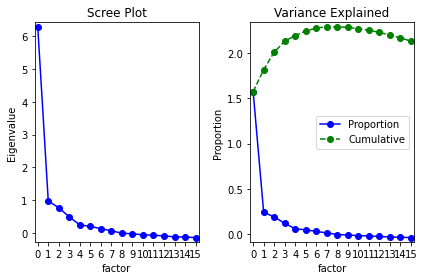

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.multivariate.factor import Factor

df = pd.read_csv('WVSW_6_2010_2014.csv')

for col in df.columns:
    df[col] = (df[col] - df[col].mean()) / df[col].std()

fa = Factor(df, n_factor=4)
res = fa.fit()

res.plot_scree()
plt.show()

# print(4)

In [6]:
import pandas as pd
from factor_analyzer import FactorAnalyzer

df = pd.read_csv('WVSW_6_2010_2014.csv')

for col in df.columns:
    df[col] = (df[col] - df[col].mean()) / df[col].std()

fa = FactorAnalyzer(n_factors=4,rotation='varimax')
fa.fit(df)

factor_df=pd.DataFrame(fa.loadings_,index = df.columns)
factor_df


C:\Users\pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


,0,1,2,3
V108,0.220949,0.227508,0.125863,0.276780
V109,0.147345,0.354425,0.091936,0.297278
V110,0.234577,0.231798,0.178381,0.739146
V111,0.195620,0.258944,0.171618,0.730537
V112,0.276735,0.171220,0.565347,0.210604
V113,0.189254,0.640520,0.193780,0.244847
V114,0.250646,0.679081,0.213182,0.203260
V115,0.229086,0.589156,0.340337,0.214478
V116,0.120432,0.263889,0.906908,0.127442
V117,0.306237,0.486868,0.409409,0.213911


#### C: Какие вопросы попадают в первый фактор?
Мы продолжаем работу с датасетом, основанном на исследовании мировых ценностей WVS Wave 6 (2010-2014).

Оригинальный датасет находится по ссылке: Inglehart, R., C. Haerpfer, A. Moreno, C. Welzel, K. Kizilova, J. Diez-Medrano, M. Lagos, P. Norris, E. Ponarin & B. Puranen et al. (eds.). 2014. World Values Survey: Round Six - Country-Pooled Datafile Version.

Факторный анализ – это метод, который позволяет сводить несколько статистически близких переменных к одной. В предыдущих задачах, мы определели, что у нас выделяются четыре фактора с собственным значением больше единицы. В этой задаче мы провели факторный анализ с четырьмя факторами для вас, ниже показан код для проведения факторного анализа:

In [7]:
results = []
for var in factor_df.index:
    if factor_df.loc[var, 0] >= 0.5:
        results.append(var)

print(results)

# print('V119', 'V120', 'V121', 'V122', 'V123')

['V119', 'V120', 'V121', 'V122', 'V123']


#### D: Какие вопросы не попадают ни в один фактор?
В предыдущей задаче вы определили переменные, которые относятся к первому фактору. А теперь вам нужно вывести названия переменных, у которых во всех столбцах значение меньше 0,5.

In [8]:
results = []
for var in factor_df.index:
    if all(x < 0.5 for x in factor_df.loc[var].to_list()):
        results.append(var)

print(results)

# print('V108', 'V109', 'V117', 'V118')

['V108', 'V109', 'V117', 'V118']


#### E: Есть ли вопросы, которые попадают в два фактора при значении больше 0.4?
В предыдущей задаче вы определили, что при значении больше 0.5 три переменных не будут относится ни к одному фактору. Мы выяснили, какие переменные относятся к первому фактору и какие переменные не относятся ни к одному фактору. В факторном анализе иногда происходит так, что при определенном значении переменная может относиться к двум факторам.

Давайте изменим условие и определим, какие названия переменных при значении больше 0.4 относятся к двум факторам.

In [ ]:
from collections import Counter

results = []
for var in factor_df.index:
    for factor in factor_df.columns:
        if factor_df.loc[var, factor] > 0.4:
            results.append(var)

duplicates = [item for item, count in Counter(results).items() if count > 1]
print(duplicates)

# print('V117')

['V117']
